In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
import math

In [8]:
# change here
base_path = './'

# Import dataframe of adsorption energy, height and orientation of water molecule 

#df_output = pd.read_csv(base_path + "lammps_T1400.log", sep=' ')

In [9]:
TEMP = [800, 1000, 1200, 1400]
Diffusivity = [0,0,0]
counter = 0
for i in TEMP:
  print(i)
  #p = np.genfromtxt (base_path + "lammps_T%d.log" %i, skip_header=114, skip_footer=123)
  p = np.genfromtxt (base_path + "lammps_T%d.log" %i, skip_header=85, skip_footer=24)
  temperature = p[:,1]
  c = np.where(temperature > i)
  time = (p[c[0][0]:,0]-p[c[0][0],0])*10**(-6)
  totLen=len(time)
  Disp1 = p[c[0][0]:,-1]
  slope, intercept, r_value, p_value, std_err = stats.linregress(time, Disp1)
  Diffusivity [counter] = slope/6
  counter = counter + 1
  t_final = time[-1]
  y = t_final * slope
  plt.plot([0,t_final],[0,y])
  
  print(slope, intercept, r_value, p_value, std_err)
  plt.plot(time, Disp1, linewidth=1, linestyle='-', label='T=' + str(i) + 'K')
  plt.legend(prop={'size': 12}, ncol=1)

plt.yscale("linear")
plt.xscale("linear")
plt.xlabel('time (ns)', fontsize = 14)   
plt.ylabel(r'Square displacement ($A^2$)', fontsize = 14)

800


ValueError: Some errors were detected !
    Line #87 (got 7 columns instead of 11)
    Line #90 (got 1 columns instead of 11)
    Line #91 (got 4 columns instead of 11)
    Line #92 (got 5 columns instead of 11)
    Line #93 (got 4 columns instead of 11)
    Line #99 (got 2 columns instead of 11)
    Line #100 (got 2 columns instead of 11)
    Line #105 (got 12 columns instead of 11)
    Line #106 (got 12 columns instead of 11)
    Line #107 (got 12 columns instead of 11)
    Line #109 (got 2 columns instead of 11)
    Line #110 (got 9 columns instead of 11)
    Line #112 (got 2 columns instead of 11)
    Line #113 (got 2 columns instead of 11)
    Line #114 (got 13 columns instead of 11)
    Line #115 (got 7 columns instead of 11)
    Line #116 (got 7 columns instead of 11)
    Line #117 (got 7 columns instead of 11)
    Line #118 (got 7 columns instead of 11)
    Line #119 (got 7 columns instead of 11)
    Line #120 (got 7 columns instead of 11)
    Line #121 (got 7 columns instead of 11)
    Line #122 (got 7 columns instead of 11)
    Line #123 (got 7 columns instead of 11)
    Line #124 (got 7 columns instead of 11)
    Line #125 (got 7 columns instead of 11)
    Line #126 (got 7 columns instead of 11)
    Line #127 (got 7 columns instead of 11)
    Line #128 (got 7 columns instead of 11)
    Line #129 (got 7 columns instead of 11)
    Line #130 (got 7 columns instead of 11)
    Line #131 (got 7 columns instead of 11)
    Line #132 (got 7 columns instead of 11)
    Line #133 (got 7 columns instead of 11)
    Line #134 (got 7 columns instead of 11)
    Line #135 (got 7 columns instead of 11)
    Line #136 (got 7 columns instead of 11)
    Line #137 (got 7 columns instead of 11)
    Line #138 (got 7 columns instead of 11)
    Line #139 (got 7 columns instead of 11)
    Line #140 (got 7 columns instead of 11)
    Line #141 (got 7 columns instead of 11)
    Line #142 (got 7 columns instead of 11)
    Line #143 (got 7 columns instead of 11)
    Line #144 (got 7 columns instead of 11)
    Line #145 (got 7 columns instead of 11)
    Line #146 (got 7 columns instead of 11)
    Line #147 (got 7 columns instead of 11)
    Line #148 (got 7 columns instead of 11)
    Line #149 (got 7 columns instead of 11)
    Line #150 (got 7 columns instead of 11)
    Line #151 (got 7 columns instead of 11)
    Line #152 (got 7 columns instead of 11)
    Line #153 (got 7 columns instead of 11)
    Line #154 (got 7 columns instead of 11)
    Line #155 (got 7 columns instead of 11)
    Line #156 (got 7 columns instead of 11)
    Line #157 (got 7 columns instead of 11)
    Line #158 (got 7 columns instead of 11)
    Line #159 (got 7 columns instead of 11)
    Line #160 (got 7 columns instead of 11)
    Line #161 (got 7 columns instead of 11)
    Line #162 (got 7 columns instead of 11)
    Line #163 (got 7 columns instead of 11)
    Line #164 (got 7 columns instead of 11)
    Line #165 (got 7 columns instead of 11)
    Line #166 (got 7 columns instead of 11)
    Line #167 (got 7 columns instead of 11)
    Line #168 (got 7 columns instead of 11)
    Line #169 (got 7 columns instead of 11)
    Line #170 (got 7 columns instead of 11)
    Line #171 (got 7 columns instead of 11)
    Line #172 (got 7 columns instead of 11)
    Line #173 (got 7 columns instead of 11)
    Line #174 (got 7 columns instead of 11)
    Line #175 (got 7 columns instead of 11)
    Line #176 (got 7 columns instead of 11)
    Line #177 (got 7 columns instead of 11)
    Line #178 (got 7 columns instead of 11)
    Line #179 (got 7 columns instead of 11)
    Line #180 (got 7 columns instead of 11)
    Line #181 (got 7 columns instead of 11)
    Line #182 (got 7 columns instead of 11)
    Line #183 (got 7 columns instead of 11)
    Line #184 (got 7 columns instead of 11)
    Line #185 (got 7 columns instead of 11)
    Line #186 (got 7 columns instead of 11)
    Line #187 (got 7 columns instead of 11)
    Line #188 (got 7 columns instead of 11)
    Line #189 (got 7 columns instead of 11)
    Line #190 (got 7 columns instead of 11)
    Line #191 (got 7 columns instead of 11)
    Line #192 (got 7 columns instead of 11)
    Line #193 (got 7 columns instead of 11)
    Line #194 (got 7 columns instead of 11)
    Line #195 (got 7 columns instead of 11)
    Line #196 (got 7 columns instead of 11)
    Line #197 (got 7 columns instead of 11)
    Line #198 (got 7 columns instead of 11)
    Line #199 (got 7 columns instead of 11)
    Line #200 (got 7 columns instead of 11)
    Line #201 (got 7 columns instead of 11)
    Line #202 (got 7 columns instead of 11)
    Line #203 (got 7 columns instead of 11)
    Line #204 (got 7 columns instead of 11)
    Line #205 (got 7 columns instead of 11)
    Line #206 (got 7 columns instead of 11)
    Line #207 (got 7 columns instead of 11)
    Line #208 (got 7 columns instead of 11)
    Line #209 (got 7 columns instead of 11)
    Line #210 (got 7 columns instead of 11)
    Line #211 (got 7 columns instead of 11)
    Line #212 (got 7 columns instead of 11)
    Line #213 (got 7 columns instead of 11)
    Line #214 (got 7 columns instead of 11)
    Line #215 (got 7 columns instead of 11)
    Line #216 (got 7 columns instead of 11)
    Line #217 (got 7 columns instead of 11)
    Line #218 (got 7 columns instead of 11)
    Line #219 (got 7 columns instead of 11)
    Line #220 (got 7 columns instead of 11)
    Line #221 (got 7 columns instead of 11)
    Line #222 (got 7 columns instead of 11)
    Line #223 (got 7 columns instead of 11)
    Line #224 (got 7 columns instead of 11)
    Line #225 (got 7 columns instead of 11)
    Line #226 (got 7 columns instead of 11)
    Line #227 (got 7 columns instead of 11)
    Line #228 (got 7 columns instead of 11)
    Line #229 (got 7 columns instead of 11)
    Line #230 (got 7 columns instead of 11)
    Line #231 (got 7 columns instead of 11)
    Line #232 (got 7 columns instead of 11)
    Line #233 (got 7 columns instead of 11)
    Line #234 (got 7 columns instead of 11)
    Line #235 (got 7 columns instead of 11)
    Line #236 (got 7 columns instead of 11)
    Line #237 (got 7 columns instead of 11)
    Line #238 (got 7 columns instead of 11)
    Line #239 (got 7 columns instead of 11)
    Line #240 (got 7 columns instead of 11)
    Line #241 (got 7 columns instead of 11)
    Line #242 (got 7 columns instead of 11)
    Line #243 (got 7 columns instead of 11)
    Line #244 (got 7 columns instead of 11)
    Line #245 (got 7 columns instead of 11)
    Line #246 (got 7 columns instead of 11)
    Line #247 (got 7 columns instead of 11)
    Line #248 (got 7 columns instead of 11)
    Line #249 (got 7 columns instead of 11)
    Line #250 (got 7 columns instead of 11)
    Line #251 (got 7 columns instead of 11)
    Line #252 (got 7 columns instead of 11)
    Line #253 (got 7 columns instead of 11)
    Line #254 (got 7 columns instead of 11)
    Line #255 (got 7 columns instead of 11)
    Line #256 (got 7 columns instead of 11)
    Line #257 (got 7 columns instead of 11)
    Line #258 (got 7 columns instead of 11)
    Line #259 (got 7 columns instead of 11)
    Line #260 (got 7 columns instead of 11)
    Line #261 (got 7 columns instead of 11)
    Line #262 (got 7 columns instead of 11)
    Line #263 (got 7 columns instead of 11)
    Line #264 (got 7 columns instead of 11)
    Line #265 (got 7 columns instead of 11)
    Line #266 (got 7 columns instead of 11)
    Line #267 (got 7 columns instead of 11)
    Line #268 (got 7 columns instead of 11)
    Line #269 (got 7 columns instead of 11)
    Line #270 (got 7 columns instead of 11)
    Line #271 (got 7 columns instead of 11)
    Line #272 (got 7 columns instead of 11)
    Line #273 (got 7 columns instead of 11)
    Line #274 (got 7 columns instead of 11)
    Line #275 (got 7 columns instead of 11)
    Line #276 (got 7 columns instead of 11)
    Line #277 (got 7 columns instead of 11)
    Line #278 (got 7 columns instead of 11)
    Line #279 (got 7 columns instead of 11)
    Line #280 (got 7 columns instead of 11)
    Line #281 (got 7 columns instead of 11)
    Line #282 (got 7 columns instead of 11)
    Line #283 (got 7 columns instead of 11)
    Line #284 (got 7 columns instead of 11)
    Line #285 (got 7 columns instead of 11)
    Line #286 (got 7 columns instead of 11)
    Line #287 (got 7 columns instead of 11)
    Line #288 (got 7 columns instead of 11)
    Line #289 (got 7 columns instead of 11)
    Line #290 (got 7 columns instead of 11)
    Line #291 (got 7 columns instead of 11)
    Line #292 (got 7 columns instead of 11)
    Line #293 (got 7 columns instead of 11)
    Line #294 (got 7 columns instead of 11)
    Line #295 (got 7 columns instead of 11)
    Line #296 (got 7 columns instead of 11)
    Line #297 (got 7 columns instead of 11)
    Line #298 (got 7 columns instead of 11)
    Line #299 (got 7 columns instead of 11)
    Line #300 (got 7 columns instead of 11)
    Line #301 (got 7 columns instead of 11)
    Line #302 (got 7 columns instead of 11)
    Line #303 (got 7 columns instead of 11)
    Line #304 (got 7 columns instead of 11)
    Line #305 (got 7 columns instead of 11)
    Line #306 (got 7 columns instead of 11)
    Line #307 (got 7 columns instead of 11)
    Line #308 (got 7 columns instead of 11)
    Line #309 (got 7 columns instead of 11)
    Line #310 (got 7 columns instead of 11)
    Line #311 (got 7 columns instead of 11)
    Line #312 (got 7 columns instead of 11)
    Line #313 (got 7 columns instead of 11)
    Line #314 (got 7 columns instead of 11)
    Line #315 (got 7 columns instead of 11)
    Line #316 (got 7 columns instead of 11)
    Line #317 (got 7 columns instead of 11)
    Line #318 (got 13 columns instead of 11)
    Line #320 (got 9 columns instead of 11)
    Line #323 (got 4 columns instead of 11)
    Line #324 (got 12 columns instead of 11)
    Line #325 (got 1 columns instead of 11)
    Line #331 (got 8 columns instead of 11)
    Line #333 (got 7 columns instead of 11)
    Line #335 (got 7 columns instead of 11)
    Line #337 (got 7 columns instead of 11)
    Line #339 (got 7 columns instead of 11)
    Line #342 (got 1 columns instead of 11)
    Line #343 (got 4 columns instead of 11)
    Line #344 (got 5 columns instead of 11)
    Line #345 (got 4 columns instead of 11)
    Line #346 (got 2 columns instead of 11)
    Line #353 (got 4 columns instead of 11)
    Line #354 (got 4 columns instead of 11)
    Line #355 (got 4 columns instead of 11)
    Line #356 (got 4 columns instead of 11)
    Line #357 (got 10 columns instead of 11)
    Line #360 (got 19 columns instead of 11)
    Line #361 (got 19 columns instead of 11)
    Line #362 (got 19 columns instead of 11)
    Line #363 (got 6 columns instead of 11)
    Line #366 (got 8 columns instead of 11)
    Line #367 (got 8 columns instead of 11)
    Line #368 (got 8 columns instead of 11)
    Line #371 (got 6 columns instead of 11)
    Line #372 (got 6 columns instead of 11)
    Line #373 (got 6 columns instead of 11)
    Line #375 (got 4 columns instead of 11)
    Line #376 (got 4 columns instead of 11)
    Line #377 (got 4 columns instead of 11)
    Line #378 (got 4 columns instead of 11)
    Line #379 (got 4 columns instead of 11)
    Line #380 (got 4 columns instead of 11)
    Line #382 (got 13 columns instead of 11)
    Line #384 (got 2 columns instead of 11)
    Line #385 (got 2 columns instead of 11)
    Line #386 (got 13 columns instead of 11)

/tmp/ipykernel_3789233/517206858.py:3: RuntimeWarning: divide by zero encountered in log
  log_D = np.log(np.array(Diffusivity))


ValueError: x and y must be the same size

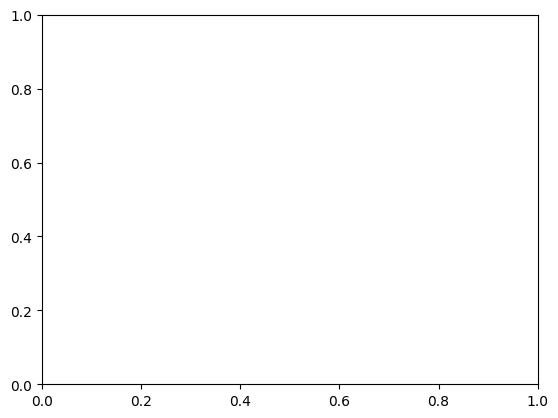

In [ ]:
K_B = 8.617e-5;
TEMP_inv = 1/np.array(TEMP)
log_D = np.log(np.array(Diffusivity))
plt.scatter(TEMP_inv,log_D)

plt.yscale("linear")
plt.xscale("linear")
plt.xlabel(r'1/T ($K^{-1}$))', fontsize = 14)   
plt.ylabel(r'Log (D) ($A^2/s$)', fontsize = 14)

slope, intercept, r_value, p_value, std_err = stats.linregress(TEMP_inv,log_D)
Y = intercept + slope * (TEMP_inv)
plt.plot(TEMP_inv,Y)
print(slope, intercept, r_value, p_value, std_err)
Q = - slope * K_B
print('activation energy of H diffusivity in this system is' ,   Q , 'eV') 

